# 线性回归（二）

<font color=blue size=4>1.课堂实验任务</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<span style="color:purple">1) 使用pandas库的read_csv()函数(可以参考[pandas的官方文档](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html))将训练数据集'train.csv'和测试数据集'test.csv'载入到Dataframe对象中。</span>

In [2]:
# Your code here

# 读取数据集
train_frame = pd.read_csv('train.csv')
test_frame = pd.read_csv('test.csv')

train_frame_2 = pd.read_csv('train2.csv')
test_frame_2 = pd.read_csv('test2.csv')

# 转化成numpy矩阵
train = np.array(train_frame)
test = np.array(test_frame)

train_2 = np.array(train_frame_2)
test_2 = np.array(test_frame_2)

# 获取特征x与目标变量y
x = train[:,0]
y = train[:,1]

# 获取特征x与目标变量y
x_test = test[:,0]
y_test = test[:,1]

# 从训练中提取特征与目标变量
x1 = train_2[:,0]
x2 = train_2[:,1]
x3 = train_2[:,2]
y2 = train_2[:,3]

# 从测试集中提取特征与目标变量
x1_test = test_2[:,0]
x2_test = test_2[:,1]
x3_test = test_2[:,2]
y2_test  = test_2[:,3]

<span style="color:purple">2 假设模型为一元线性回归模型$\hat{y}=wx+b$, 损失函数为$l(w,b)=\frac{1}{2}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$, 其中$\hat{y}^{(i)}$表示第$i$个样本的预测值，$y^{(i)}$表示第$i$个样本的实际标签值, $m$为训练集中样本的个数。求出使得损失函数最小化的参数$w$和$b$。</span>

方法① 

将$l(w,b)$分别对$w$和$b$求导，得到
$$
\frac{\partial l(w,b)}{\partial w}=w\sum_{i=1}^m x_i^2 -\sum_{i=1}^m (y_i-b)x_i,
$$
$$
\frac{\partial l(w,b)}{\partial b}=mb -\sum_{i=1}^m (y_i-wx_i),
$$
令上述两式为零即可得到$w$和$b$的解析解：
$$
w=\frac{\sum_{i=1}^m y_i (x_i-\bar{x})}{\sum_{i=1}^m x_i^2-\frac{1}{m}(\sum_{i=1}^m x_i)^2},
$$
$$
b=\frac{1}{m}\sum_{i=1}^m(y_i-wx_i),
$$
其中$\bar{x}=\frac{1}{m}\sum_{i=1}^m x_i$为$x$的均值。



In [3]:
# Your code here

# 计算数据总量
m = len(x)

# 计算 x 的平均值
x_mean = np.mean(x)

# 计算参数 w
w_LS = np.sum(y * (x - x_mean)) / (np.sum(x**2) - (np.sum(x))**2 / m)

# 计算参数 b
b_LS = np.sum(y - w_LS * x) / m

# 打印参数 w 和 b
print("参数 w:", w_LS)
print("参数 b:", b_LS)


参数 w: 3.041478870014284
参数 b: 4.906073659228104


方法② 梯度下降法。手动实现梯度下降法(不使用机器学习框架，如PyTorch、TensorFlow等)来进行模型的训练。算法步骤如下：1.初始化模型参数$w$和$b$的值；2.在负梯度的方向上更新参数(批量梯度下降、小批量随机梯度下降或者随机梯度下降均可)，并不断迭代这一步骤，更新公式(以小批量随机梯度下降为例)可以写成：$$w\gets w-\frac{\eta}{\left|B\right|}\sum_{i\in{B}}x^{(i)}(wx^{(i)}+b-y^{(i)})$$, 和$$b\gets b-\frac{\eta}{\left|B\right|}\sum_{i\in{B}}(wx^{(i)}+b-y^{(i)})$$， 其中$\eta$表示学习率,$B$表示每次迭代中随机抽样的小批量，$\left|B\right|$则表示$B$中的样本数量。3. 终止条件为迭代次数达到某一上限或者参数更新的幅度小于某个阈值。

In [4]:
# Your code here

# 初始化参数 w 和 b
w_GD = 3.0
b_GD = 5.0

# 超参数(学习率、小批量大小、迭代轮数)设置
learning_rate = 0.01
batch_size = 32
max_iterations = 1000  
threshold = 1e-5

pre_params = [b_GD, w_GD]

# 迭代训练
for iteration in range(max_iterations):
    # 分批处理数据
    for i in range(0, len(x), batch_size):
        x_batch = x[i : i+batch_size]
        y_batch = y[i : i+batch_size]

        # 计算小批量梯度
        w_gradient = np.sum(x_batch * (w_GD * x_batch + b_GD - y_batch))
        b_gradient = np.sum(w_GD * x_batch + b_GD - y_batch)

        # 更新参数
        w_GD -= learning_rate * w_gradient / batch_size
        b_GD -= learning_rate * b_gradient / batch_size
    
    # 阈值判断
    param_updates = [b_GD - pre_params[0], w_GD - pre_params[1]]
    if all(abs(param) < threshold for param in param_updates):
        print(f"在经过 {iteration + 1} 次迭代后终止")
        break
    pre_params = [b_GD, w_GD]
    
# 打印最终参数 w 和 b
print("最终参数 w:", w_GD)
print("最终参数 b:", b_GD)


在经过 444 次迭代后终止
最终参数 w: 3.038782642024898
最终参数 b: 4.905842608599712


方法③ 

用矩阵表示，假设数据集有$m$个样本，特征有$n$维$。X=\left[ \begin{matrix} x_{11} & x_{12} & \cdots & x_{1n} & 1 \\
                         x_{21} & x_{22} & \cdots & x_{2n} & 1 \\
                         \vdots & \vdots &      & \vdots & \vdots \\
                         x_{m1} & x_{m2} & \cdots & x_{mn} & 1 \end{matrix} \right]$,
        实际标签$Y=\left[ \begin{matrix} y_{1} \\
                         y_{2} \\
                         \vdots \\
                         y_{m}\end{matrix} \right]$,
        参数$B=\left[ \begin{matrix} w_{1} \\
                         w_{2} \\
                         \vdots \\
                         w_{n} \\
                         b\end{matrix} \right]$，则解析解为$B^*=(X^T X)^{-1}X^T Y$。推导过程可参考[这篇文章](https://zhuanlan.zhihu.com/p/74157986)。

In [5]:
# Your code here

# 构建特征矩阵 X 和目标变量向量 Y
X = np.column_stack((x,))
X = np.c_[np.ones(X.shape[0]), X]

# 计算参数
X1 = np.dot(X.T, X)
X2 = np.dot(X.T, y)
w = np.linalg.solve(X1, X2)

# 提取参数 b, w_MA
b_MA, w_MA = w[0], w[1]

# 打印参数
print("参数 w:", w_MA)
print("参数 b:", b_MA)


参数 w: 3.041478870014308
参数 b: 4.906073659228064


<span style="color:purple">3) 使用求解出来的线性回归模型对测试数据集'test.csv'进行预测，输出可视化结果（比如用seaborn或者matplotlib等可视化库来画出测试数据的散点图以及训练好的模型函数图像）。</span>

特征统计学方法所得均方误差MSE: 0.17026808677223365
梯度下降算法所得均方误差MSE: 0.16987132482375156


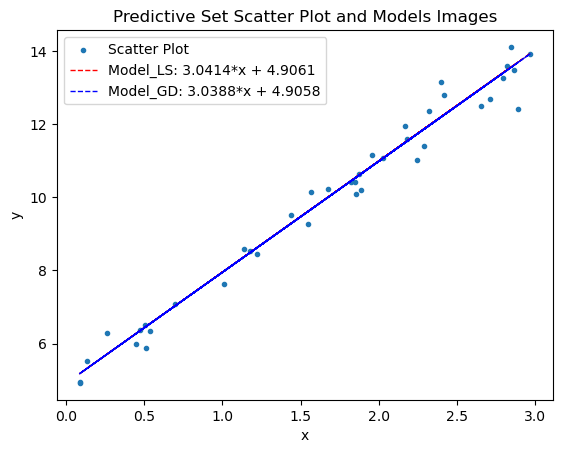

In [6]:
# Your code here

# 画出散点图
plt.scatter(x_test, y_test, label='Scatter Plot', marker='.')

# 画出训练好的模型函数图像
model_LS = w_LS * x_test + b_LS
model_GD = w_GD * x_test + b_GD

MSE_LS = np.mean((y_test - model_LS) ** 2)
MSE_GD = np.mean((y_test - model_GD) ** 2)
print("特征统计学方法所得均方误差MSE:", MSE_LS)
print("梯度下降算法所得均方误差MSE:", MSE_GD)

plt.plot(x_test, model_LS, color='red', linewidth=1.0, linestyle='--', label='Model_LS: 3.0414*x + 4.9061')
plt.plot(x_test, model_GD, color='blue', linewidth=1.0, linestyle='--', label='Model_GD: 3.0388*x + 4.9058')

# 设置坐标标签、直线图例和图片
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.title('Predictive Set Scatter Plot and Models Images')
plt.show()


<span style="color:purple">4) 在训练数据集'train2.csv'上求一个三元线性回归模型$\hat{y}=w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3$的使得损失函数$l(w_0,w_1,w_2,w_3)=\frac{1}{2}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$最小的参数$w_0,w_1,w_2$以及$w_3$。并在测试数据集'test2.csv'上进行预测，输出预测结果的均方误差$MSE(\hat{y},y)=\frac{1}{n}\sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2$, $n$为测试集中样本个数。</span>

方法① 同2)中的方法③。

In [7]:
# Your code here

# 构建训练集和测试集特征矩阵 X_train 和目标变量向量 Y
X_train = np.column_stack((x1, x2, x3))
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

X_test = np.column_stack((x1_test, x2_test, x3_test))
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# 计算参数
X_train1 = np.dot(X_train.T, X_train)
X_train2 = np.dot(X_train.T, y2)
w = np.linalg.solve(X_train1, X_train2)

# 获取预测值
y2_pre = np.dot(X_test, w)

# 提取参数 w0, w1, w2, w3
w0, w1, w2, w3 = w[0], w[1], w[2], w[3]

# 打印参数
print("参数 w0:", w0)
print("参数 w1:", w1)
print("参数 w2:", w2)
print("参数 w3:", w3)

# 计算均方误差
MSE = np.mean((y2_test - y2_pre) ** 2)
print("均方误差 MSE:", MSE)


参数 w0: 5.942543927259509
参数 w1: 1.0072300078584673
参数 w2: 2.0033937115307268
参数 w3: 3.0102562412206266
均方误差 MSE: 0.16537691128952478


方法② 类似2)中的方法②。算法步骤如下：1.初始化模型参数$w_0,w_1,w_2,w_3$的值；2.在负梯度的方向上更新参数(批量梯度下降、小批量随机梯度下降或者随机梯度下降均可)，并不断迭代这一步骤，更新公式(以小批量随机梯度下降为例)可以写成：$$w_j\gets w_j-\frac{\eta}{\left|B\right|}\sum_{i\in{B}}x_j^{(i)}(w_0 + w_1 x_1^{(i)}+w_2 x_2^{(i)}+w_3 x_3^{(i)}-y^{(i)}), j=0,1,2,3$$, 其中$x_0^{(i)}=1$， 其中$\eta$表示学习率,$B$表示每次迭代中随机抽样的小批量，$\left|B\right|$则表示$B$中的样本数量。3. 终止条件为迭代次数达到某一上限或者参数更新的幅度小于某个阈值。

In [8]:
# Your code here

w0_GD = 6.0
w1_GD = 1.0
w2_GD = 2.0
w3_GD = 3.0

# 超参数(学习率、小批量大小、最大迭代次数、参数更新阈值)设置
learning_rate = 0.01
batch_size = 32
max_iterations = 1000  
threshold = 1e-5

pre_params = [w0_GD, w1_GD, w2_GD, w3_GD]

# 迭代训练
for iteration in range(max_iterations):
    # 分批处理数据
    for i in range(0, len(y2), batch_size):
        x1_batch = x1[i:i+batch_size]
        x2_batch = x2[i:i+batch_size]
        x3_batch = x3[i:i+batch_size]
        y2_batch = y2[i:i+batch_size]

        # 利用公式计算小批量梯度
        w0_gradient_2 = np.sum(w0_GD + w1_GD * x1_batch + w2_GD * x2_batch + w3_GD * x3_batch - y2_batch)
        w1_gradient_2 = np.sum(x1_batch * (w0_GD + w1_GD * x1_batch + w2_GD * x2_batch + w3_GD * x3_batch - y2_batch))
        w2_gradient_2 = np.sum(x2_batch * (w0_GD + w1_GD * x1_batch + w2_GD * x2_batch + w3_GD * x3_batch - y2_batch))
        w3_gradient_2 = np.sum(x3_batch * (w0_GD + w1_GD * x1_batch + w2_GD * x2_batch + w3_GD * x3_batch - y2_batch))

        # 更新参数
        w0_GD -= learning_rate * w0_gradient_2 / batch_size
        w1_GD -= learning_rate * w1_gradient_2 / batch_size
        w2_GD -= learning_rate * w2_gradient_2 / batch_size
        w3_GD -= learning_rate * w3_gradient_2 / batch_size

    
    param_updates = [w0_GD - pre_params[0], w1_GD - pre_params[1], w2_GD - pre_params[2], w3_GD - pre_params[3]]
    if all(abs(param) < threshold for param in param_updates):
        print(f"在经过 {iteration + 1} 次迭代后终止")
        break

    pre_params = [w0_GD, w1_GD, w2_GD, w3_GD]

# 打印参数 w 和 b
print("最终参数 w0:", w0_GD)
print("最终参数 w1:", w1_GD)
print("最终参数 w2:", w2_GD)
print("最终参数 w3:", w3_GD)

# 计算均方误差
MSE = np.sum((y2_test - w0_GD - w1_GD * x1_test -w2_GD * x2_test - w3_GD * x3_test)**2) / len(y2_test)
print("均方误差MSE为:", MSE)


在经过 688 次迭代后终止
最终参数 w0: 5.9448441577560605
最终参数 w1: 1.007697872416319
最终参数 w2: 2.003240760505262
最终参数 w3: 3.0103396659690156
均方误差MSE为: 0.16468549022039308


<font color=blue size=4>2.相关链接</font>

1.实验报告提交链接(有效期直至9.15 14:20): https://send2me.cn/211f55kq/Sgav4JPN0foh9Q

2.实验课件获取链接: https://www.jianguoyun.com/p/DWcqLm4Qp5WhChjZi5sFIAA